In [7]:
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.Utility import *
from TO_sim.Utility import *
from TO_sim.To_Draw import *
import numpy as np
import matplotlib.pyplot as plt
import parmap
DF = 'Review/22.10.04/'

# Kc case1에서의 이론적인 K값에서의 행동을 확인,  
IS state에서 시작함

In [2]:
def check_case1_KR(m):
    Ks = np.linspace(0.1,6,1000)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    min_KF = min(KF)
    min_RF = min(RF)
    return min_KF,min_RF
func_case1 = np.vectorize(check_case1_KR)

In [34]:
m = 1
Ks = np.linspace(0.1,6,1000)
KF,RF,KB,RB = map(np.array,Make_theorical_KR(Ks,m))
min_KF = min(KF)
min_RF = min(RF)
AS_l = np.searchsorted(KB,min_KF)
AS_r = np.searchsorted(KB,min_KF,side='right')
RB[np.array([AS_l,AS_r])]

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


array([0.26181645, 0.26061402])

In [161]:
@timing
def check_case2_KR(m):
    Ks = np.linspace(0.1,6,1000)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    min_KBidx = np.argmin(KB)
    min_KB = KB[min_KBidx]
    min_RB = RB[min_KBidx]
    return min_KB,min_RB
@timing
def check_case1_KR_atcase2(m):
    Ks = np.linspace(0.1,6,1000)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    min_KF = min(KF)
    min_KF_KBidx = np.searchsorted(KB,min_KF)
    min_KF_KB = KB[min_KF_KBidx]
    min_KF_RB = RB[min_KF_KBidx]
    return min_KF_KB,min_KF_RB
@timing
def draw_case12_KR(m):
    Ks = np.linspace(0.1,6,500)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    return KF,RF,KB,RB


func_case2 = np.vectorize(check_case2_KR)
func_case12 = np.vectorize(check_case1_KR_atcase2)

In [159]:
ms = np.arange(0.9,6+0.1/2,0.1)

In [162]:
S = func_case1(ms)
S2 = func_case2(ms)
# S3 = func_case12(ms)

In [186]:
S2 = func_case2(ms)

func:'check_case2_KR' args:[(0.9,), {}] took: 0.7457 sec
func:'check_case2_KR' args:[(0.9,), {}] took: 0.7559 sec
func:'check_case2_KR' args:[(1.0,), {}] took: 0.7442 sec
func:'check_case2_KR' args:[(1.1,), {}] took: 0.7760 sec
func:'check_case2_KR' args:[(1.2,), {}] took: 0.7461 sec
func:'check_case2_KR' args:[(1.2999999999999998,), {}] took: 0.7270 sec
func:'check_case2_KR' args:[(1.4,), {}] took: 0.7190 sec
func:'check_case2_KR' args:[(1.5,), {}] took: 0.7240 sec
func:'check_case2_KR' args:[(1.5999999999999999,), {}] took: 0.7229 sec
func:'check_case2_KR' args:[(1.6999999999999997,), {}] took: 0.7208 sec
func:'check_case2_KR' args:[(1.7999999999999998,), {}] took: 0.7350 sec
func:'check_case2_KR' args:[(1.9,), {}] took: 0.7240 sec
func:'check_case2_KR' args:[(1.9999999999999996,), {}] took: 0.7300 sec
func:'check_case2_KR' args:[(2.0999999999999996,), {}] took: 0.7160 sec
func:'check_case2_KR' args:[(2.1999999999999997,), {}] took: 0.7213 sec
func:'check_case2_KR' args:[(2.3,), {}] 

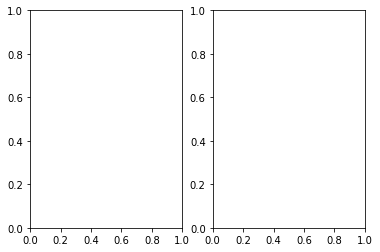

In [167]:
fig,(ax1,ax2) = plt.subplots(1,2)

In [170]:
Create_Folder('Review/22.10.04/')

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


func:'draw_case12_KR' args:[(0.9,), {}] took: 0.4090 sec
func:'draw_case12_KR' args:[(1.0,), {}] took: 0.3790 sec
func:'draw_case12_KR' args:[(1.1,), {}] took: 0.3870 sec
func:'draw_case12_KR' args:[(1.2,), {}] took: 0.3764 sec
func:'draw_case12_KR' args:[(1.2999999999999998,), {}] took: 0.3822 sec
func:'draw_case12_KR' args:[(1.4,), {}] took: 0.3820 sec
func:'draw_case12_KR' args:[(1.5,), {}] took: 0.3761 sec
func:'draw_case12_KR' args:[(1.5999999999999999,), {}] took: 0.3750 sec
func:'draw_case12_KR' args:[(1.6999999999999997,), {}] took: 0.3690 sec
func:'draw_case12_KR' args:[(1.7999999999999998,), {}] took: 0.3710 sec
func:'draw_case12_KR' args:[(1.9,), {}] took: 0.3700 sec
func:'draw_case12_KR' args:[(1.9999999999999996,), {}] took: 0.3720 sec
func:'draw_case12_KR' args:[(2.0999999999999996,), {}] took: 0.3680 sec
func:'draw_case12_KR' args:[(2.1999999999999997,), {}] took: 0.3640 sec
func:'draw_case12_KR' args:[(2.3,), {}] took: 0.3630 sec
func:'draw_case12_KR' args:[(2.399999999

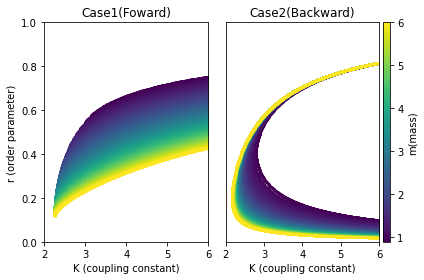

In [185]:
color_idx = np.linspace(0,1,len(ms))
color = plt.cm.viridis(color_idx)
fig,(ax1,ax2) = plt.subplots(1,2)

for i,m in enumerate(ms):
    KF,RF,KB,RB = draw_case12_KR(m)
    
    # plt.vlines(min(KB),0,1)
    plt.subplot(121)
    plt.title('Case1(Foward)')
    plt.scatter(KF,RF,color = color[i],s=1)
    plt.subplot(122)
    plt.title('Case2(Backward)')
    plt.scatter(KB,RB,color = color[i],s=1)
plt.subplot(121)
plt.xlabel('K (coupling constant)')
plt.ylabel('r (order parameter)')
plt.xlim(2,6)
plt.ylim(0,1)
# plt.grid()
plt.subplot(122)
plt.xlabel('K (coupling constant)')
plt.xlim(2,6)
plt.ylim(0,1)

# plt.grid()
plt.yticks([])
sca = plt.scatter(0*ms,0*ms,c=ms,s=0)

# plt.colorbar()
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
cbar.set_label('m(mass)')
plt.tight_layout()
plt.savefig('Review/22.10.04/Theorical graph.png',dpi=400)

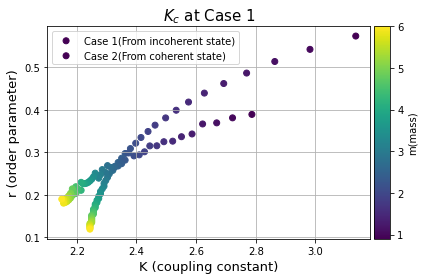

In [188]:
plt.grid()
sca = plt.scatter(*S,c=ms,label = 'Case 1(From incoherent state)')
plt.scatter(*S2,c=ms,label = 'Case 2(From coherent state)')
# plt.scatter(*S2,c=ms,label = 'initial K')
plt.legend()
plt.title('$K_c$ at Case 1',fontsize= 15)
plt.xlabel('K (coupling constant)',fontsize= 13)
plt.ylabel('r (order parameter)',fontsize= 13)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
cbar.set_label('m(mass)')

plt.tight_layout()
# plt.savefig('Review/22.10.04/Kc at case 1.png',dpi=400)


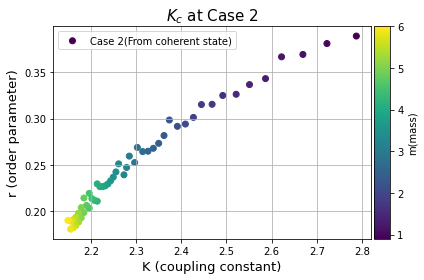

In [189]:
plt.grid()
sca = plt.scatter(*S2,c=ms,label = 'Case 2(From coherent state)')
# plt.scatter(*S2,c=ms,label = 'initial K')
plt.legend()
plt.title('$K_c$ at Case 2',fontsize= 15)
plt.xlabel('K (coupling constant)',fontsize= 13)
plt.ylabel('r (order parameter)',fontsize= 13)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
cbar.set_label('m(mass)')

plt.tight_layout()
plt.savefig('Review/22.10.04/Kc at case 2.png',dpi=400)


In [44]:
N = 5000
seed = 12
theta_init, omega_init, Kc = Quantile_Lorentzian(N, 0, 1, seed=seed)
dtheta_init = np.zeros(N)
dK = 0.1
K_append = np.arange(0,2+dK/2,dK)
# theta_init = np.zeros(N)
t_end = 1600
dt = 0.1
# @timing
def Check_rk4_dt(K,m):
    theta_s, dtheta_s, omega, rs, t = Sol_Kuramoto_mf(N,K,m,(0, t_end),dt=dt,
                p_theta=theta_init,
                p_dtheta=dtheta_init,
                p_omega=omega_init,
                distribution="Normal",)
    return t, rs


In [20]:
Slack_Notification()

In [32]:
t_uniform,_,_ = Quantile_Lorentzian(N, 0, 1, seed=seed)
t_12,_,_ = Quantile_Lorentzian(N, 0, 1, seed=12)
t_15,_,_ = Quantile_Lorentzian(N, 0, 1, seed=15)

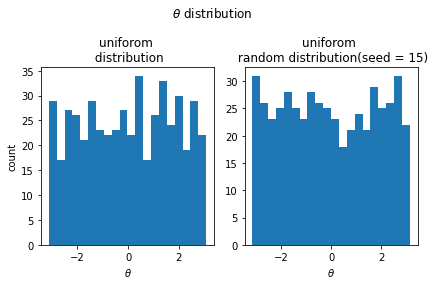

In [38]:
plt.subplot(121)
plt.hist(theta_init,bins=20);
plt.title(f'uniforom \n distribution')
plt.ylabel('count')
plt.xlabel(r'$\theta$')
plt.subplot(122)
plt.hist(t_15,bins=20);
plt.title(f'uniforom \n random distribution(seed = 15)')
plt.suptitle(r"$\theta$ distribution")
plt.xlabel(r'$\theta$')

plt.tight_layout()
# plt.savefig(DF+'theta distribution uniform + uniform random 15.png',dpi=400)


In [ ]:
AS=[[Check_rk4_dt(K+Kp,m) for Kp in K_append] for K,m in zip(S[0],ms)]
Slack_Notification()
# AS=AS[:10]+ [Check_rk4_dt(K,m) for K,m i n zip(S[0][10:15],ms[10:15])]

In [45]:
K_append = np.arange(0,6+0.1/2,0.1)
mset = np.array([0.95,2,6])
Kset = func_case1(mset)
RTMset = [[Check_rk4_dt(K+Kp,m) for Kp in tqdm(K_append)] for K,m in zip(Kset[0],mset)]
Slack_Notification()

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

In [6]:
def make_sec_mean(rs,sec,dt,start,end):
    interval = int(sec/dt)
    len_rs = len(rs)
    partition = len_rs//interval
    make_partition = lambda x: rs[x*interval:x*interval+interval]
    PART = np.arange(partition)
    rss = [make_partition(x) for x in PART]
    mean_rss = list(map(np.mean,rss))
    mean_times = PART*sec
    start_idx, end_idx =np.searchsorted(mean_times,[start,end])
    return mean_times[start_idx:end_idx], mean_rss[start_idx:end_idx]

In [134]:
Kset

(array([3.05295295, 2.41511512, 2.24384384]),
 array([0.55801988, 0.33500141, 0.11893863]))

Kc,R(Kc),K_plus
3.0529529529529533 0.5580198808485322 0.30000000000000004 3.352952952952953
2.4151151151151153 0.33500140958564995 2.2 4.615115115115115
2.243843843843844 0.11893862983705479 3.9000000000000004 6.143843843843845


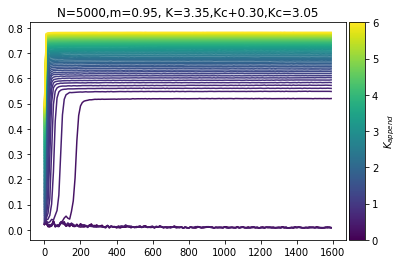

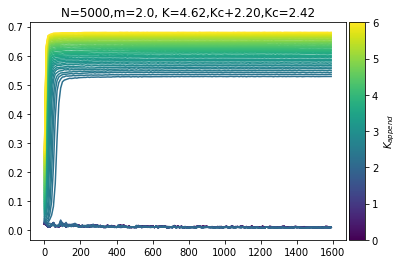

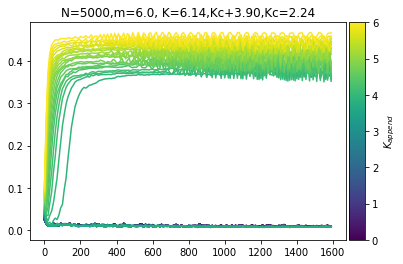

In [46]:
show_s = 0
show_e = 3200
mean_time = 10
# color_idx = np.linspace(0,1,len(AS))
# color = plt.cm.viridis(ms[:14])
# for i,((t,r),m)  in enumerate(zip(AS,ms)):
    
#     plt.hlines(S[1][i],show_s-20,show_e+20,color=color[i],linestyles='--')
print('Kc,R(Kc),K_plus')
for i,m in enumerate(mset):
    fig = plt.figure()
    color_idx = np.linspace(0,1,len(K_append))
    color = plt.cm.viridis(color_idx)
    sca = plt.scatter(np.zeros(len(RTMset[i])),np.zeros(len(RTMset[i])),c=K_append,s=0)
    num = 0
    for j,(t,r) in enumerate(RTMset[i]):
        ts,rs = make_sec_mean(r,mean_time,dt,show_s,show_e)
        if max(rs)>0.2 and num ==0:
            print(Kset[0][i],Kset[1][i],K_append[j],Kset[0][i]+K_append[j]);num+=1
            plt.plot(ts,rs,label=f'Kp={K_append[j]:.02f}',color =color[j])
            that_K = Kset[0][i]+K_append[j]
            plt.title(f'N={N},m={m}, K={that_K:.02f},Kc+{K_append[j]:.02f},Kc={Kset[0][i]:.02f}')
        else:
            plt.plot(ts,rs,label=f'Kp={K_append[j]:.02f}',color =color[j])
            pass
            
        # plt.plot(t,r,label=f'Kp={K_append[j]:.02f}',color =color[j])
    # plt.legend(loc=2)
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
    cbar.set_label('$K_{append}$')
    plt.xlabel('time [s]')
    plt.xlabel('r(order parameter)')
    # plt.colorbar()
    # plt.savefig(DF+f'm={m},single,K_append.png',dpi=400)
    # plt.title(f'm={m}')

## seed 있을 때

Kc,R(Kc),K_plus
3.0529529529529533 0.5580198808485322 0.30000000000000004 3.352952952952953
2.4151151151151153 0.33500140958564995 2.2 4.615115115115115
2.243843843843844 0.11893862983705479 3.9000000000000004 6.143843843843845


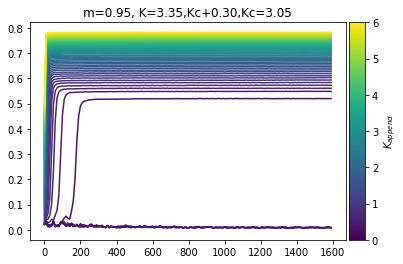

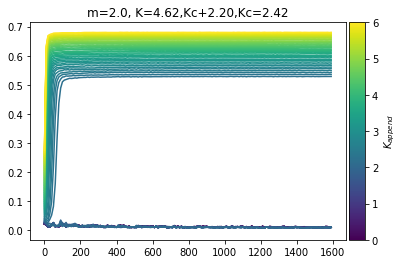

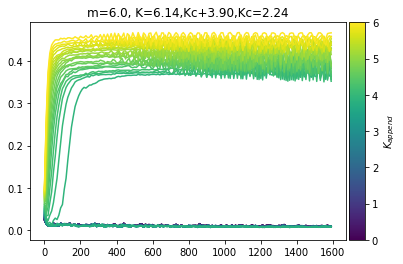

In [48]:
show_s = 0
show_e = t_end
mean_time = 10
# color_idx = np.linspace(0,1,len(AS))
# color = plt.cm.viridis(ms[:14])
# for i,((t,r),m)  in enumerate(zip(AS,ms)):
    
#     plt.hlines(S[1][i],show_s-20,show_e+20,color=color[i],linestyles='--')
print('Kc,R(Kc),K_plus')
for i,m in enumerate(mset):
    plt.figure()
    color_idx = np.linspace(0,1,len(K_append))
    color = plt.cm.viridis(color_idx)
    sca = plt.scatter(np.zeros(len(RTMset[i])),np.zeros(len(RTMset[i])),c=K_append,s=0)
    num = 0
    for j,(t,r) in enumerate(RTMset[i]):
        ts,rs = make_sec_mean(r,mean_time,dt,show_s,show_e)
        if max(rs)>0.2 and num ==0:
            print(Kset[0][i],Kset[1][i],K_append[j],Kset[0][i]+K_append[j]);num+=1
            plt.plot(ts,rs,label=f'Kp={K_append[j]:.02f}',color =color[j])
            that_K = Kset[0][i]+K_append[j]
            plt.title(f'm={m}, K={that_K:.02f},Kc+{K_append[j]:.02f},Kc={Kset[0][i]:.02f}')
        else:
            plt.plot(ts,rs,label=f'Kp={K_append[j]:.02f}',color =color[j])
            pass
            
        # plt.plot(t,r,label=f'Kp={K_append[j]:.02f}',color =color[j])
    # plt.legend(loc=2)
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
    cbar.set_label('$K_{append}$')
    plt.xlabel('time [s]')
    plt.xlabel('r(order parameter)')
    # plt.colorbar()
    plt.savefig(DF+f'N={N},m={m},K_append,seed={seed}.png',dpi=400)
    # plt.title(f'm={m}')

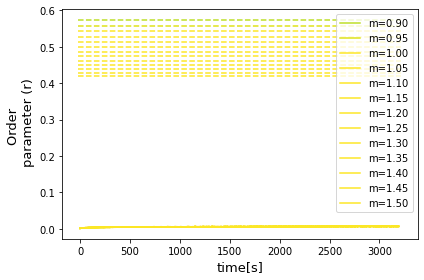

In [70]:
show_s = 0
show_e = 3200
mean_time = 10
color_idx = np.linspace(0,1,len(AS))
color = plt.cm.viridis(ms[:14])
for i,((t,r),m)  in enumerate(zip(AS,ms)):
    plt.plot(*make_sec_mean(r,mean_time,dt,show_s,show_e),color = color[i],label = f'm={m:.02f}')
    plt.hlines(S[1][i],show_s-20,show_e+20,color=color[i],linestyles='--')
    # plt.hlines(S3[1][i],show_s-20,show_e+20,color=color[i],linestyles='--')
    pass
plt.legend()
# plt.ylim(0.6)
plt.xlabel('time[s]',fontsize=13)
plt.ylabel('Order \n parameter (r)',fontsize=13)

# plt.title(f'm={m},N={N},K={K} \ndt={dt},'+r'$t_{end}$'+f'={t_end}s, '+r'$t_{interval}$'+f'={show_interval*dt:.02f} rtol={rtol}',fontsize=15)
# plt.title(f'm={m},N={N},K={K} \ndt={dt},'+r'$t_{end}$'+f'={t_end}s, '+r'$t_{interval}$'+f'={mean_time:.02f}',fontsize=15)
plt.tight_layout()
# plt.savefig(DF+f'{show_s,show_e}, m={m}, N={N},dt={dt},'+'RK4 + solve_ivp + rtol'+r't_end'+f'={t_end}s, rtol = {rtol}.png',dpi=400)

# check long time at Kc(m)

In [235]:
ms = np.arange(0.8,1.5+0.05/2,0.05)
S = func_case1(ms)

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


In [236]:
KRatKC_m=[Check_rk4_dt(K,m) for K,m in tqdm(list(zip(S[0],ms)))]

  0%|          | 0/15 [00:00<?, ?it/s]

func:'Check_rk4_dt' args:[(3.324624624624625, 0.8), {}] took: 54.7355 sec
func:'Check_rk4_dt' args:[(3.2242242242242245, 0.8500000000000001), {}] took: 55.9796 sec
func:'Check_rk4_dt' args:[(3.135635635635636, 0.9000000000000001), {}] took: 54.8898 sec
func:'Check_rk4_dt' args:[(3.0529529529529533, 0.9500000000000002), {}] took: 55.4232 sec
func:'Check_rk4_dt' args:[(2.982082082082082, 1.0000000000000002), {}] took: 54.9872 sec
func:'Check_rk4_dt' args:[(2.923023023023023, 1.0500000000000003), {}] took: 56.0660 sec
func:'Check_rk4_dt' args:[(2.8639639639639642, 1.1000000000000003), {}] took: 56.0467 sec
func:'Check_rk4_dt' args:[(2.816716716716717, 1.1500000000000004), {}] took: 55.7586 sec
func:'Check_rk4_dt' args:[(2.7694694694694695, 1.2000000000000004), {}] took: 55.4150 sec
func:'Check_rk4_dt' args:[(2.7281281281281284, 1.2500000000000004), {}] took: 55.3750 sec
func:'Check_rk4_dt' args:[(2.692692692692693, 1.3000000000000005), {}] took: 55.5905 sec
func:'Check_rk4_dt' args:[(2.65

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 

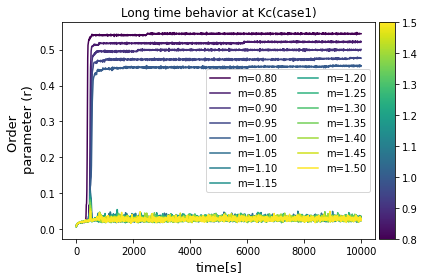

In [238]:
show_s = 0
show_e = t_end
mean_time = 10
color_idx = np.linspace(0,1,len(ms))
color = plt.cm.viridis(color_idx)
sca = plt.scatter(0*ms,0*ms,s=0,c = ms)
for i,((t,r),m)  in enumerate(zip(KRatKC_m,ms)):
    print(i,end=' ')
    plt.plot(*make_sec_mean(r,mean_time,dt,show_s,show_e),color = color[i],label = f'm={m:.02f}')
    # plt.hlines(S[1][i],show_s-20,show_e+20,color=color[i],linestyles='--')
    pass
plt.legend(ncol=2)
plt.xlabel('time[s]',fontsize=13)
plt.ylabel('Order \n parameter (r)',fontsize=13)
plt.title('Long time behavior at Kc(case1)')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar =fig.colorbar(sca, cax=cax, orientation='vertical')
# plt.title(f'm={m},N={N},K={K} \ndt={dt},'+r'$t_{end}$'+f'={t_end}s, '+r'$t_{interval}$'+f'={show_interval*dt:.02f} rtol={rtol}',fontsize=15)
# plt.title(f'm={m},N={N},K={K} \ndt={dt},'+r'$t_{end}$'+f'={t_end}s, '+r'$t_{interval}$'+f'={mean_time:.02f}',fontsize=15)
plt.tight_layout()
plt.savefig(DF+f'{show_s,show_e}, m={m}, N={N},dt={dt},t_end={t_end}s,mean_time ={mean_time} .png',dpi=400)